# 深層学習スクラッチ ディープニューラルネットワーク

【問題1】全結合層のクラス化

In [6]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """ 
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        A = np.dot(X, self.W) + self.B
        return A
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        self.optimizer.update
        # 更新
        self = self.optimizer.update(self)
        return dZ

【問題2】初期化方法のクラス化

In [7]:
import numpy as np

class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        return self.sigma * np.random.rand(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        return self.sigma * np.random.rand(n_nodes2)

In [8]:
# 確認
class c:
    def __init__(self, n_nodes1, n_nodes2, initial):
        self.W = initial.W(n_nodes1, n_nodes2)
        self.B = initial.B(n_nodes2)

a = c(n_nodes1=10, n_nodes2=5, initial=SimpleInitializer(sigma=0.01))
print(f'初期化重み:\n{a.W}')
print(f'初期化バイアス:\n{a.B}')

初期化重み:
[[0.00460154 0.00239285 0.00939916 0.0006086  0.00363186]
 [0.00968991 0.00944888 0.00760566 0.00782661 0.00104218]
 [0.00498341 0.00791552 0.00883185 0.00614388 0.00968851]
 [0.00936968 0.00144015 0.00542901 0.00816911 0.00717064]
 [0.00018168 0.00753633 0.00442851 0.00412923 0.00085417]
 [0.00212097 0.00590537 0.00978601 0.0039267  0.00826371]
 [0.00103552 0.00798286 0.00380225 0.00572066 0.00041489]
 [0.00622936 0.00963491 0.00552287 0.00342894 0.00374006]
 [0.00748851 0.00837549 0.00909923 0.002084   0.00471579]
 [0.00914756 0.00086606 0.00207528 0.00681485 0.00568636]]
初期化バイアス:
[0.00364833 0.00362021 0.00936003 0.00468012 0.0052603 ]


【問題3】最適化手法のクラス化

In [9]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update_W(self, layer_a, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer_z, layer_a : 更新前の層のインスタンス
        """
        W = layer.W - self.lr * np.dot(layer.W.T, layer_a)
        return W
    
    def update_B(self, layer):
        B = layer.B - self.lr * layer.B.sum(axis=0)
        return B

【問題4】活性化関数のクラス化

In [10]:
class activate:
    def __init__(self):
        pass
    
    def sigmoid(self, A):
        return 1 / (1 + np.exp(-A))

    def tanh(self, A):
        return np.tanh(A)

    def softmax(self, A):
        return np.exp(A) / np.sum(np.exp(A))
    
    def logsumexp(self, x):
        """Calculates log(sum(exp(x))).
        """
        xmax = x.max(axis=1, keepdims=True)
        return np.log(np.exp(x - xmax).sum(axis=1, keepdims=True)) + xmax

    def loss(self, y, z):
        if y.ndim == 1:
            z = z.reshape(1, z.size)
            y = y.reshape(1, y.size)
        return -(y * z).mean(axis=0).sum()

【問題5】ReLUクラスの作成

In [11]:
class relu:
    def __init__(self):
        pass
    
    def fwd_relu(self, A):
        return np.where(A > 0, A, 0)
    
    def bck_relu(self, A):
        return np.where(A > 0, 1, 0)

In [12]:
# 確認
relu = relu()
a = np.arange(-5, 5, 0.5)
print(f'a:\n{a}')
print(f'fwd_relu:\n{relu.fwd_relu(a)}')
print(f'bck_relu:\n{relu.bck_relu(a)}')

a:
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]
fwd_relu:
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  1.5 2.  2.5 3.  3.5
 4.  4.5]
bck_relu:
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


【問題6】重みの初期値

In [13]:
import numpy as np

class CustomInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def Xavier(self, n_nodes1, n_nodes2):
        """
        重み, バイアスの初期化:活性化関数にシグモイドやハイパボリックタンジェントの時
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = np.random.normal(0, np.sqrt(1 / n_nodes1), (n_nodes1, n_nodes2))
        B = np.random.normal(0, np.sqrt(1 / n_nodes1), n_nodes2)
        return W, B

    def He(self, n_nodes1, n_nodes2):
        """
        重み, バイアスの初期化:活性化関数にReLUを使う時
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        W = np.random.normal(0, np.sqrt(2 / n_nodes1), (n_nodes1, n_nodes2))
        B = np.random.normal(0, np.sqrt(2 / n_nodes1), n_nodes2)
        return W, B

【問題7】最適化手法

In [14]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.H_i = 0
        self.B_i = 0
    def update(self, layer_z, layer_a, layer):
        self.H_i += np.dot(layer_z, layer_a) ** 2
        self.B_i += layer_a.sum(axis=0) ** 2
        layer.W -= self.lr * np.sqrt(1 / self.H_i) * layer_z
        layer.B -= self.lr * np.sqrt(1 / self.B_i) * layer_a.sum(axis=0)

【問題8】クラスの完成

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        return self.sigma * np.random.rand(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        return self.sigma * np.random.rand(n_nodes2)
    
class Xavier:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        return np.random.normal(0, np.sqrt(1 / self.n_nodes1), (n_nodes1, n_nodes2))

    def B(self, n_nodes2):
        return np.random.normal(0, np.sqrt(1 / self.n_nodes1), n_nodes2)
    
class He:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        return np.random.normal(0, np.sqrt(2 / self.n_nodes1), (n_nodes1, n_nodes2))

    def B(self, n_nodes2):
        return np.random.normal(0, np.sqrt(2 / self.n_nodes1), n_nodes2)

class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer_z, layer_a : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return
    
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.H_i = 0
        self.B_i = 0
    def update(self, layer_z, layer_a, layer):
        self.H_i += np.dot(layer_z, layer_a) ** 2
        self.B_i += layer_a.sum(axis=0) ** 2
        layer.W -= self.lr * np.sqrt(1 / self.H_i) * layer_z
        layer.B -= self.lr * np.sqrt(1 / self.B_i) * layer_a.sum(axis=0)

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """ 
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        self.X = X
        A = np.dot(X, self.W) + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dZ = np.dot(dA, self.W.T)
        self.dB = dA.sum(axis=0)
        self.dW = np.dot(self.X.T, dA)
        # 更新
        self = self.optimizer.update(self)
        return dZ

class actsoftmax:
    def forward(self, x):
        """Calculates log(sum(exp(x))).
        """
        xmax = x.max(axis=1, keepdims=True)
        z = np.log(np.exp(x - xmax).sum(axis=1, keepdims=True)) + xmax
        Z = x - z
        self.Z = np.exp(Z)
        return Z
    
    def backward(self, Y, Z):
        batch_size = Y.shape[0]
        return (Z - Y) / batch_size

    def loss_func(self, y, z):
        if y.ndim == 1:
            z = z.reshape(1, z.size)
            y = y.reshape(1, y.size)
        return -(y * z).mean(axis=0).sum()
    
class actsigmoid:
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        bck_sig = self.sigmoid(self.A)
        return dZ * (1 - bck_sig) * bck_sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
class acttanh:
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)
    
class actrelu:
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)
        

class ScratchDeepNeuralNetworkClassifier:
    
    def __init__(self, input_size=784, hidden1_size=400, hidden2_size=200, output_size=10,
                sigma=0.01, batch_size=20, lr=0.01, verbose=True, act=acttanh, opt=None):
        self.verbose = verbose
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.sigma = sigma
        self.batch_size = batch_size
        self.lr = lr
        
        # self.sigma : ガウス分布の標準偏差
        # self.lr : 学習率
        # self.hidden1_size : 1層目のノード数
        # self.hidden2_size : 2層目のノード数
        # self.output_size : 出力層のノード数
        # 各層の設定
        # optimizerの設定
        if opt == None:
            optimizer = SGD(self.lr)
            
        elif opt == 'Ada':
            optimizer = AdaGrad(self.lr)
            
        if act == acttanh:
            initial = SimpleInitializer(self.sigma)
            
        elif act == actsigmoid:
            initial = Xavier(self.sigma)
            
        elif act == actrelu:
            initial = He(self.sigma)
        
        self.FC1 = FC(self.input_size, self.hidden1_size, initial, optimizer)
        self.activation1 = act() # tanh
        self.FC2 = FC(self.hidden1_size, self.hidden2_size, initial, optimizer)
        self.activation2 = act() # tanh
        self.FC3 = FC(self.hidden2_size, self.output_size, initial, optimizer)
        self.activation3 = actsoftmax() # Softmax
        
    def forward(self, X):
        # イテレーション毎の順伝搬
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3
    
    def backward(self, y):
        # イテレーション毎の逆伝搬
        dA3 = self.activation3.backward(y, self.activation3.Z) # 交差エントロピー誤差とソフトマックスを合わせている
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
    
    # 正解率を出力
    def accuracy(self, y, z):
        return (z.argmax(axis=1) == y).sum()
        
    def fit(self, X, y, X_val=None, y_val=None, epochs=20):
        div_iter = 600
        plot_data = []
        
        for epoch in range(epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            loss_sum = 0
            for i in range(len(get_mini_batch)):
                X_train, y_train = get_mini_batch[i]
                batch_size = X_train.shape[0]
                self.X = X_train.reshape(batch_size, 784)
                self.y = (y_train.reshape(-1, 1) == np.arange(10)).astype(np.float64)

#                 print(self.activation3.Z)
                Z3 = self.forward(self.X)
                loss = self.activation3.loss_func(self.y, Z3)
                self.backward(self.y)
                loss_sum += loss
                
                if self.verbose and (i + 1) % div_iter == 0:
                    train_loss = loss_sum / div_iter
                    self.y_val = (y_val.reshape(-1, 1) == np.arange(10)).astype(np.float64)
                    self.X_val = X_val.reshape(X_val.shape[0], 784)
                    val_Z3 = self.forward(self.X_val)
                    val_loss = self.activation3.loss_func(self.y_val, val_Z3)
                    val_accuracy = self.accuracy(y_val, self.activation3.Z)
                    
                    print(f'epoch: {epoch + 1} / {epochs}, iteration: {i + 1} / {len(get_mini_batch)} | train loss : {train_loss:.3} | val loss: {val_loss:.3} | accuracy: {val_accuracy / len(y_val)}')
                    loss_sum = 0
                    
                    iters_per_epoch = len(X) / self.batch_size
                    plot_data.append((epoch + (i + 1) / iters_per_epoch, train_loss, val_loss))
                    
        if self.verbose:
            epochs, train_loss, val_loss = zip(*plot_data)
            plt.plot(epochs, train_loss, color='g', label='train loss')
            plt.plot(epochs, val_loss, color='b', label='val loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.legend()
            plt.show()
                
    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        
        return np.argmax(self.activation3.Z, axis=1)

【問題9】学習と推定

In [81]:
# ミニバッチ処理のサンプルクラス
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [82]:
# MNISTダウンロード
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 用意した画像データセットを(サンプル数, 一次元の画素数)型に変換
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape, X_test.shape)

# 画素値を正規化処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

# trainとvalデータに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(60000, 784) (10000, 784)
0.0 1.0
0.0 1.0
(48000, 784) (12000, 784)
(48000,) (12000,)


In [83]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        return self.sigma * np.random.rand(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        return self.sigma * np.random.rand(n_nodes2)
    
class Xavier:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        return np.random.normal(0, np.sqrt(1 / self.n_nodes1), (n_nodes1, n_nodes2))

    def B(self, n_nodes2):
        return np.random.normal(0, np.sqrt(1 / self.n_nodes1), n_nodes2)
    
class He:
    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        return np.random.normal(0, np.sqrt(2 / self.n_nodes1), (n_nodes1, n_nodes2))

    def B(self, n_nodes2):
        return np.random.normal(0, np.sqrt(2 / self.n_nodes1), n_nodes2)

class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer_z, layer_a : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return
    
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.H_i = 0
        self.B_i = 0
    def update(self, layer_z, layer_a, layer):
        self.H_i += np.dot(layer_z, layer_a) ** 2
        self.B_i += layer_a.sum(axis=0) ** 2
        layer.W -= self.lr * np.sqrt(1 / self.H_i) * layer_z
        layer.B -= self.lr * np.sqrt(1 / self.B_i) * layer_a.sum(axis=0)

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """ 
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        self.X = X
        A = np.dot(X, self.W) + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dZ = np.dot(dA, self.W.T)
        self.dB = dA.sum(axis=0)
        self.dW = np.dot(self.X.T, dA)
        # 更新
        self = self.optimizer.update(self)
        return dZ

class actsoftmax:
    def forward(self, x):
        """Calculates log(sum(exp(x))).
        """
        xmax = x.max(axis=1, keepdims=True)
        z = np.log(np.exp(x - xmax).sum(axis=1, keepdims=True)) + xmax
        Z = x - z
        self.Z = np.exp(Z)
        return Z
    
    def backward(self, Y, Z):
        batch_size = Y.shape[0]
        return (Z - Y) / batch_size

    def loss_func(self, y, z):
        if y.ndim == 1:
            z = z.reshape(1, z.size)
            y = y.reshape(1, y.size)
        return -(y * z).mean(axis=0).sum()
    
class actsigmoid:
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        bck_sig = self.sigmoid(self.A)
        return dZ * (1 - bck_sig) * bck_sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
class acttanh:
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)
    
class actrelu:
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)
        

class ScratchDeepNeuralNetworkClassifier:
    
    def __init__(self, input_size=784, hidden1_size=400, hidden2_size=200, output_size=10,
                sigma=0.01, batch_size=20, lr=0.01, verbose=True, act=acttanh, opt=None):
        self.verbose = verbose
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.sigma = sigma
        self.batch_size = batch_size
        self.lr = lr
        
        # self.sigma : ガウス分布の標準偏差
        # self.lr : 学習率
        # self.hidden1_size : 1層目のノード数
        # self.hidden2_size : 2層目のノード数
        # self.output_size : 出力層のノード数
        # 各層の設定
        # optimizerの設定
        if opt == None:
            optimizer = SGD(self.lr)
            
        elif opt == 'Ada':
            optimizer = AdaGrad(self.lr)
            
        # activateの設定
        if act == acttanh:
            initial = SimpleInitializer(self.sigma)
            
        elif act == actsigmoid:
            initial = Xavier(self.sigma)
            
        elif act == actrelu:
            initial = He(self.sigma)
        
        self.FC1 = FC(self.input_size, self.hidden1_size, initial, optimizer)
        self.activation1 = act() # tanh
        self.FC2 = FC(self.hidden1_size, self.hidden2_size, initial, optimizer)
        self.activation2 = act() # tanh
        self.FC3 = FC(self.hidden2_size, self.output_size, initial, optimizer)
        self.activation3 = actsoftmax() # Softmax
        
    def forward(self, X):
        # イテレーション毎の順伝搬
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3
    
    def backward(self, y):
        # イテレーション毎の逆伝搬
        dA3 = self.activation3.backward(y, self.activation3.Z) # 交差エントロピー誤差とソフトマックスを合わせている
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
    
    # 正解率を出力
    def accuracy(self, y, z):
        return (z.argmax(axis=1) == y).sum()
        
    def fit(self, X, y, X_val=None, y_val=None, epochs=20):
        div_iter = 600
        plot_data = []
        
        for epoch in range(epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            loss_sum = 0
            for i in range(len(get_mini_batch)):
                X_train, y_train = get_mini_batch[i]
                batch_size = X_train.shape[0]
                self.X = X_train.reshape(batch_size, 784)
                self.y = (y_train.reshape(-1, 1) == np.arange(10)).astype(np.float64)

#                 print(self.activation3.Z)
                Z3 = self.forward(self.X)
                loss = self.activation3.loss_func(self.y, Z3)
                self.backward(self.y)
                loss_sum += loss
                
                if self.verbose and (i + 1) % div_iter == 0:
                    train_loss = loss_sum / div_iter
                    self.y_val = (y_val.reshape(-1, 1) == np.arange(10)).astype(np.float64)
                    self.X_val = X_val.reshape(X_val.shape[0], 784)
                    val_Z3 = self.forward(self.X_val)
                    val_loss = self.activation3.loss_func(self.y_val, val_Z3)
                    val_accuracy = self.accuracy(y_val, self.activation3.Z)
                    
                    print(f'epoch: {epoch + 1} / {epochs}, iteration: {i + 1} / {len(get_mini_batch)} | train loss : {train_loss:.3} | val loss: {val_loss:.3} | accuracy: {val_accuracy / len(y_val)}')
                    loss_sum = 0
                    
                    iters_per_epoch = len(X) / self.batch_size
                    plot_data.append((epoch + (i + 1) / iters_per_epoch, train_loss, val_loss))
                    
        if self.verbose:
            epochs, train_loss, val_loss = zip(*plot_data)
            plt.plot(epochs, train_loss, color='g', label='train loss')
            plt.plot(epochs, val_loss, color='b', label='val loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.legend()
            plt.show()
                
    def predict(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        
        return np.argmax(self.activation3.Z, axis=1)

epoch: 1 / 10, iteration: 600 / 2400 | train loss : 2.31 | val loss: 2.29 | accuracy: 0.11366666666666667
epoch: 1 / 10, iteration: 1200 / 2400 | train loss : 2.29 | val loss: 2.27 | accuracy: 0.18008333333333335
epoch: 1 / 10, iteration: 1800 / 2400 | train loss : 2.24 | val loss: 2.18 | accuracy: 0.23125
epoch: 1 / 10, iteration: 2400 / 2400 | train loss : 2.02 | val loss: 1.87 | accuracy: 0.29425
epoch: 2 / 10, iteration: 600 / 2400 | train loss : 1.74 | val loss: 1.6 | accuracy: 0.36291666666666667
epoch: 2 / 10, iteration: 1200 / 2400 | train loss : 1.53 | val loss: 1.47 | accuracy: 0.403
epoch: 2 / 10, iteration: 1800 / 2400 | train loss : 1.44 | val loss: 1.42 | accuracy: 0.43966666666666665
epoch: 2 / 10, iteration: 2400 / 2400 | train loss : 1.39 | val loss: 1.37 | accuracy: 0.45008333333333334
epoch: 3 / 10, iteration: 600 / 2400 | train loss : 1.34 | val loss: 1.32 | accuracy: 0.4761666666666667
epoch: 3 / 10, iteration: 1200 / 2400 | train loss : 1.29 | val loss: 1.25 | acc

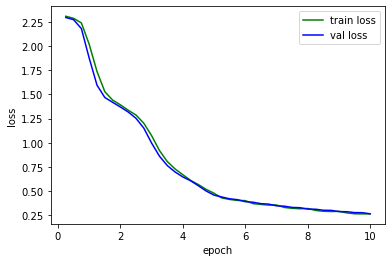

予測結果の正解率: 0.9245


In [122]:
# 3層, 初期値ガウス分布、tanh使用の結果
network = ScratchDeepNeuralNetworkClassifier()
network.fit(X_train, y_train, X_val, y_val, epochs=10)
pred = network.predict(X_test)

from sklearn import metrics

print(f'予測結果の正解率: {metrics.accuracy_score(y_test, pred)}')

epoch: 1 / 10, iteration: 600 / 2400 | train loss : 2.29 | val loss: 2.26 | accuracy: 0.11341666666666667
epoch: 1 / 10, iteration: 1200 / 2400 | train loss : 2.24 | val loss: 2.21 | accuracy: 0.16125
epoch: 1 / 10, iteration: 1800 / 2400 | train loss : 2.17 | val loss: 2.12 | accuracy: 0.5196666666666667
epoch: 1 / 10, iteration: 2400 / 2400 | train loss : 2.05 | val loss: 1.96 | accuracy: 0.4374166666666667
epoch: 2 / 10, iteration: 600 / 2400 | train loss : 1.85 | val loss: 1.72 | accuracy: 0.6255833333333334
epoch: 2 / 10, iteration: 1200 / 2400 | train loss : 1.59 | val loss: 1.45 | accuracy: 0.6208333333333333
epoch: 2 / 10, iteration: 1800 / 2400 | train loss : 1.34 | val loss: 1.22 | accuracy: 0.72425
epoch: 2 / 10, iteration: 2400 / 2400 | train loss : 1.13 | val loss: 1.05 | accuracy: 0.7104166666666667
epoch: 3 / 10, iteration: 600 / 2400 | train loss : 0.978 | val loss: 0.917 | accuracy: 0.764
epoch: 3 / 10, iteration: 1200 / 2400 | train loss : 0.868 | val loss: 0.822 | ac

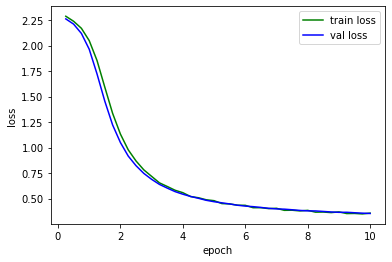

予測結果の正解率: 0.9037


In [108]:
# 3層, 初期値Xahiber, 活性化sigmoid使用の結果
network = ScratchDeepNeuralNetworkClassifier(act=actsigmoid)
network.fit(X_train, y_train, X_val, y_val, epochs=10)
pred = network.predict(X_test)

print(f'予測結果の正解率: {metrics.accuracy_score(y_test, pred)}')

epoch: 1 / 10, iteration: 600 / 2400 | train loss : 0.876 | val loss: 0.459 | accuracy: 0.8749166666666667
epoch: 1 / 10, iteration: 1200 / 2400 | train loss : 0.396 | val loss: 0.355 | accuracy: 0.8979166666666667
epoch: 1 / 10, iteration: 1800 / 2400 | train loss : 0.329 | val loss: 0.311 | accuracy: 0.9140833333333334
epoch: 1 / 10, iteration: 2400 / 2400 | train loss : 0.304 | val loss: 0.279 | accuracy: 0.9185
epoch: 2 / 10, iteration: 600 / 2400 | train loss : 0.268 | val loss: 0.27 | accuracy: 0.9215833333333333
epoch: 2 / 10, iteration: 1200 / 2400 | train loss : 0.247 | val loss: 0.248 | accuracy: 0.9266666666666666
epoch: 2 / 10, iteration: 1800 / 2400 | train loss : 0.231 | val loss: 0.232 | accuracy: 0.9333333333333333
epoch: 2 / 10, iteration: 2400 / 2400 | train loss : 0.23 | val loss: 0.216 | accuracy: 0.9355833333333333
epoch: 3 / 10, iteration: 600 / 2400 | train loss : 0.207 | val loss: 0.215 | accuracy: 0.9365
epoch: 3 / 10, iteration: 1200 / 2400 | train loss : 0.19

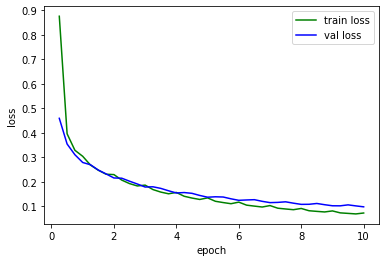

予測結果の正解率: 0.9716


In [125]:
# 3層, 初期値He、ReLU使用の結果
network = ScratchDeepNeuralNetworkClassifier(act=actrelu)
network.fit(X_train, y_train, X_val, y_val, epochs=10)
pred = network.predict(X_test)

from sklearn import metrics

print(f'予測結果の正解率: {metrics.accuracy_score(y_test, pred)}')